In [1]:
import pandas as pd

## Using the gapminder_total dataset solve the following tasks with pandas one-liners:

```python
# 1. Read in data:
df = pd.read_csv('../data/gapminder_total.csv')

# 2. What is the median population in the data set?

# 3. How often does each continent appear in the data set?

# 4. Which continent has the lowest average fertility rate overall?

# 5. What was the average life expectancy in Europe in 2015? 
# Hint: first filter for 2015 then apply groupby.

# 6. How many countries does each continent have in the dataset?
# Hint: filter for one year and count

# 7. What is the average population of a European country in 1976 compare to 2015?
# Hint: once again filter for the year in question and do each year separately to compare

# BONUS

# 8. What is the highest population a continent ever had?
# Hint: group by multiple columns

# 9. Which continent had that population and in which year?
# Hint: group by multiple columns and filter for the result from #6

# 10. Plot a bar plot comparison of life_expectancy, fertility, population average per continent
# Hint: for a quick and dirty graph use Pandas ploting ability
# Hint: use log=True to make the visual more friendly to the eyes
````


In [2]:
# 1. Read in data:

df = pd.read_csv('../data/gapminder_total.csv', index_col=0)
df

,year,country,continent,population,fertility,life expectancy
0,1950,Afghanistan,Asia,7752118.0,7.67,26.85
1,1950,Albania,Europe,1263171.0,5.80,54.48
2,1950,Algeria,Africa,8872247.0,7.65,42.77
3,1950,Angola,Africa,4354882.0,6.93,30.70
4,1950,Antigua and Barbuda,North America,46301.0,4.45,57.97
...,...,...,...,...,...,...
16948,2016,Virgin Islands (U.S.),NaN,NaN,NaN,80.82
16949,2016,Yemen,Asia,NaN,NaN,64.92
16950,2016,Zambia,Africa,NaN,NaN,57.10
16951,2016,Zimbabwe,Africa,NaN,NaN,61.69


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16953 entries, 0 to 16952
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             16953 non-null  int64  
 1   country          16953 non-null  object 
 2   continent        11920 non-null  object 
 3   population       16741 non-null  float64
 4   fertility        13262 non-null  float64
 5   life expectancy  13707 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 927.1+ KB


In [4]:
# checking if the NA's drop using the below

# df[['population']].dropna(axis=0, subset=['population']).sort_values(by='population', ascending=False).isnull().sum
df[['population']].sort_values(by='population', ascending=False).isnull().sum()

population    212
dtype: int64

In [5]:
# 2. What is the median population in the data set?

#df[['population']].dropna(axis=0, subset=['population']).median()
df[['population']].median()


population    3047769.0
dtype: float64

+ Dropping NA's: 3047769
+ Without dropping NA's: 3047769

In [6]:
# 3. How often does each continent appear in the data set?

df.groupby('continent')[['country']].count()

,country
continent,
Africa,3350
Asia,2613
Australia and Oceania,868
Europe,2945
North America,1340
South America,804


In [7]:
df.dropna(axis=0, subset=['country']).groupby('continent')[['country']].count()

,country
continent,
Africa,3350
Asia,2613
Australia and Oceania,868
Europe,2945
North America,1340
South America,804


In [8]:
# 4. Which continent has the lowest average fertility rate overall?

df_cont_fert_avg = df.groupby('continent')[['fertility']].mean()
df_cont_fert_avg.sort_values(by='fertility')

,fertility
continent,
Europe,2.169754
North America,4.002329
South America,4.077235
Asia,4.673862
Australia and Oceania,4.682172
Africa,5.931345


In [9]:
df_cont_fert_avg = df.dropna(axis=0, subset=['fertility']).groupby('continent')[['fertility']].mean()
df_cont_fert_avg.sort_values(by='fertility')

,fertility
continent,
Europe,2.169754
North America,4.002329
South America,4.077235
Asia,4.673862
Australia and Oceania,4.682172
Africa,5.931345


In [10]:
# 5. What was the average life expectancy in Europe in 2015? 
# Hint: first filter for 2015 then apply groupby.

#df.groupby('continent')=='Europe'

eu2015 = df[(df['year']==2015)&(df['continent']=='Europe')]
eu2015.describe()

,year,population,fertility,life expectancy
count,44.0,4.400000e+01,40.000000,41.000000
mean,2015.0,1.375192e+07,1.627750,78.902439
std,0.0,2.030272e+07,0.210049,3.569908
min,2015.0,3.178100e+04,1.310000,71.000000
25%,2015.0,2.043270e+06,1.457500,76.200000
50%,2015.0,5.586269e+06,1.550000,80.500000
75%,2015.0,1.064604e+07,1.822500,81.800000
max,2015.0,8.068854e+07,2.060000,84.800000


In [11]:
print('full EU 2015 data: ',round(eu2015['life expectancy'].mean(),2))

print("Dropped NA's EU 2015 data: ",round(eu2015.dropna(axis=0, subset=['life expectancy'])['life expectancy'].mean(),2))

full EU 2015 data:  78.9
Dropped NA's EU 2015 data:  78.9


In [13]:
g1 = df.groupby('continent')

eu = g1.get_group('Europe')

round(eu[eu['year']==2015]['life expectancy'].mean(),2)

78.9

In [14]:
# 6. How many countries does each continent have in the dataset?
# Hint: filter for one year and count

pd.DataFrame(g1['country'].nunique())

,country
continent,
Africa,50
Asia,39
Australia and Oceania,13
Europe,44
North America,20
South America,12


In [17]:
# 7. What is the average population of a European country in 1976 compare to 2015?
# Hint: once again filter for the year in question and do each year separately to compare

g1 = df.groupby('continent')

eu = g1.get_group('Europe')

print('avg European pop. 1976:',round(eu[eu['year']==1976]['population'].mean(),2))
print('avg European pop. 2015:',round(eu[eu['year']==2015]['population'].mean(),2))
print('This equates to a growth of',round((eu[eu['year']==2015]['population'].mean())-(eu[eu['year']==1976]['population'].mean()),2))



avg European pop. 1976: 12584567.3
avg European pop. 2015: 13751921.48
This equates to a growth of 1167354.18


In [18]:
df.sample(5)

,year,country,continent,population,fertility,life expectancy
13855,1960,Turks and Caicos Islands,NaN,5724.0,NaN,NaN
14831,1978,Norfolk Island,NaN,1833.0,NaN,NaN
13964,1962,Tokelau,NaN,1938.0,NaN,NaN
8918,1994,Guinea-Bissau,Africa,1155111.0,6.40,52.2
9957,1999,Madagascar,Africa,15262817.0,5.65,58.8


In [19]:
df[(df['year']==2016)]['population'].max()

nan

In [20]:
# 8. What is the highest population a continent ever had?
# Hint: group by multiple columns

df2 = pd.DataFrame(df.groupby(['continent','year'])['population'].sum()/1_000_000)
df2
df2.sort_values(by="population",ascending=False)

population
continent             year             
Asia                  2015  4271.610225
                      2014  4228.900125
                      2013  4185.461665
                      2012  4141.516871
                      2011  4097.338925
...                                 ...
Africa                2016     0.000000
Europe                2016     0.000000
Australia and Oceania 2016     0.000000
North America         2016     0.000000
South America         2016     0.000000

[402 rows x 1 columns]

In [21]:
df3 = pd.DataFrame(df.dropna(axis=0).groupby(['continent','year'])['population'].sum()/1_000_000)
df3.sort_values(by="population",ascending=False)

population
continent             year             
Asia                  2015  4271.610225
                      2014  4228.900125
                      2013  4185.461665
                      2012  4141.516871
                      2011  4097.338925
...                                 ...
Australia and Oceania 1954    13.558163
                      1953    13.274994
                      1952    12.992013
                      1951    12.699006
                      1950    12.382390

[396 rows x 1 columns]

In [22]:
# 9. Which continent had that population and in which year?
# Hint: group by multiple columns and filter for the result from #6

df3 = pd.DataFrame(df.dropna(axis=0).groupby(['continent','year'])['population'].sum()/1_000_000)
df3.sort_values(by="population",ascending=False)

population
continent             year             
Asia                  2015  4271.610225
                      2014  4228.900125
                      2013  4185.461665
                      2012  4141.516871
                      2011  4097.338925
...                                 ...
Australia and Oceania 1954    13.558163
                      1953    13.274994
                      1952    12.992013
                      1951    12.699006
                      1950    12.382390

[396 rows x 1 columns]

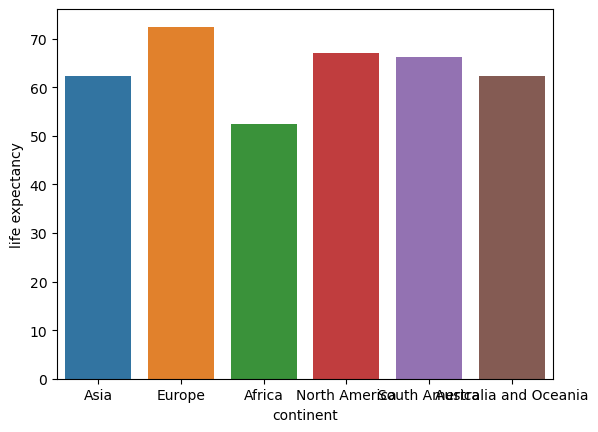

In [33]:
# 10. Plot a bar plot comparison of life_expectancy, fertility, population average per continent
# Hint: for a quick and dirty graph use Pandas ploting ability
# Hint: use log=True to make the visual more friendly to the eyes

import seaborn as sns

sns.barplot(data=df, x='continent', y='life expectancy',errorbar=None);

In [23]:
df.sample(5)

,year,country,continent,population,fertility,life expectancy
13797,1959,Serbia excluding Kosovo,NaN,6254498.0,NaN,NaN
7201,1985,Spain,Europe,38734330.0,1.63,76.34
12378,2011,Mayotte,NaN,214924.0,3.99,78.74
5919,1979,Jordan,Asia,2208562.0,7.33,67.00
15300,1987,Anguilla,NaN,7198.0,NaN,NaN


In [44]:
df4 = df.groupby('continent').mean(numeric_only=True).reset_index()
df4

,continent,year,population,fertility,life expectancy
0,Africa,1983.000000,1.046038e+07,5.931345,52.376773
1,Asia,1983.000000,6.990949e+07,4.673862,62.411267
2,Australia and Oceania,1982.885945,1.843673e+06,4.682172,62.257492
3,Europe,1982.966384,1.254645e+07,2.169754,72.485936
4,North America,1983.000000,1.949375e+07,4.002329,67.078769
5,South America,1983.000000,2.168660e+07,4.077235,66.211604


<Axes: xlabel='continent'>

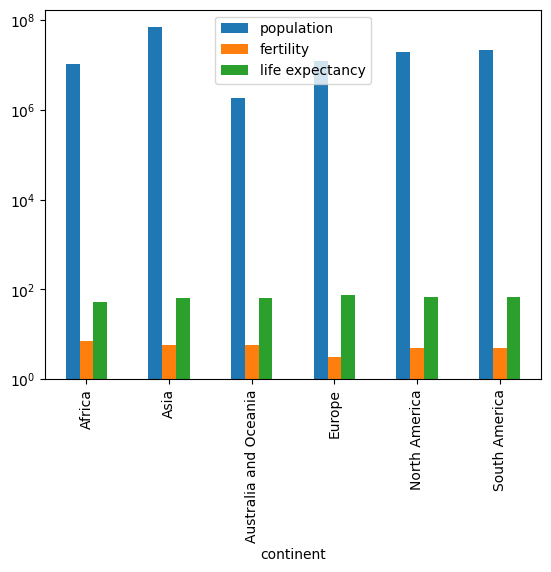

In [49]:


df4.plot(x='continent', y=['population', 'fertility', 'life expectancy'], kind="bar", log=True)